In [4]:
#Finding Lagrange Points
using LinearAlgebra
using ForwardDiff

In [5]:
#mass parameter for Earth Moon system
μ = 1.215e-2

0.01215

In [6]:
function quintic_residual_L1(x)
    
    r = x^5-(3-μ)*x^4+(3-2*μ)*x^3 - μ*x^2 + 2*μ*x - μ
    
    return r
end

quintic_residual_L1 (generic function with 1 method)

In [7]:
function quintic_residual_L2(x)
    
    r = x^5+(3-μ)*x^4+(3-2*μ)*x^3 - μ*x^2 - 2*μ*x - μ
    
    return r
end

quintic_residual_L2 (generic function with 1 method)

In [8]:
#Series expansion as initial guess
rh = (μ/3)^(1/3) #Hill radius

y1_1 = rh*(1-(1/3)*rh-(1/9)*rh^2)
y2_1 = rh*(1+(1/3)*rh-(1/9)*rh^2)

0.16741810963732096

In [9]:
#Finding y1

# vectors for storing the x_k's and r(x_k)'s
X_1 = NaN*ones(10)
R_1 = NaN*ones(10)
    
# initial guess from the 3rd order Hills Taylor Expansion
X_1[1] = y1_1 #initial guess
R_1[1] = quintic_residual_L1(X_1[1]) #initial residual
    
# store x values in X, R values in R 
    
#maximum iterations
max_iters = 10
tol = 1e-12
    
trim = 0
    
for i=1:max_iters-1
        
    #find the residual
    R_1[i] = quintic_residual_L1(X_1[i])
        
    if abs(R_1[i])<tol
            
        trim = i
        break
            
    end
        
    #Find the derivative
    J_1 = ForwardDiff.derivative(quintic_residual_L1, X_1[i])
        
    delta_x1 = J_1\-R_1[i]
        
    X_1[i+1] = X_1[i] + delta_x1
        
end

In [10]:
R_y1 = R_1[1:trim]
X_y1 = X_1[1:trim]

y1 = X_y1[end]

0.1509319926830696

In [11]:
#Finding y1

# vectors for storing the x_k's and r(x_k)'s
X_2 = NaN*ones(10)
R_2 = NaN*ones(10)
    
# initial guess from the 3rd order Hills Taylor Expansion
X_2[1] = y2_1 #initial guess
R_2[1] = quintic_residual_L2(X_2[1]) #initial residual
    
# store x values in X, R values in R 
    
#maximum iterations
max_iters = 10
tol = 1e-12
    
trim = 0
    
for i=1:max_iters-1
        
    #find the residual
    R_2[i] = quintic_residual_L2(X_2[i])
        
    if abs(R_2[i])<tol
            
        trim = i
        break
            
    end
        
    #Find the derivative
    J_2 = ForwardDiff.derivative(quintic_residual_L2, X_2[i])
        
    delta_x2 = J_2\-R_2[i]
        
    X_2[i+1] = X_2[i] + delta_x2
        
end

In [12]:
R_y2= R_2[1:trim]
X_y2 = X_2[1:trim]

y2 = X_y2[end]

0.16782991309473538

In [13]:
print(y1)

0.1509319926830696

In [14]:
#both points are on either side of m2

#x position of L1
XL1 = (1-μ) - y1
display(XL1)

#x position of L2
XL2 = (1-μ) + y2
display(XL2)

0.8369180073169304

1.1556799130947355

In [15]:
#checking stability near Equilibria
#evaluating at L1
x_e = XL1

μ_bar = μ*abs(x_e - 1+μ)^(-3) + (1-μ)*abs(x_e+μ)^(-3)

a = 2*μ_bar+1
b = μ_bar-1

L_left = [a 0; 0 -b]
L_right = [0 2; -2 0]
A = [zeros((2,2)) I; L_left L_right]

4×4 Matrix{Float64}:
  0.0      0.0       1.0  0.0
  0.0      0.0       0.0  1.0
 11.2951   0.0       0.0  2.0
  0.0     -4.14757  -2.0  0.0

In [16]:
eigvals(A)

4-element Vector{ComplexF64}:
     -2.9320486822959824 + 0.0im
 -2.7755575615628914e-17 - 2.334381315836003im
 -2.7755575615628914e-17 + 2.334381315836003im
      2.9320486822959824 + 0.0im

In [17]:
#checking stability near Equilibria
#evaluating at L2
x_e = XL2

μ_bar = μ*abs(x_e - 1+μ)^(-3) + (1-μ)*abs(x_e+μ)^(-3)

a = 2*μ_bar+1
b = μ_bar-1

L_left = [a 0; 0 -b]
L_right = [0 2; -2 0]
A = [zeros((2,2)) I; L_left L_right]

4×4 Matrix{Float64}:
 0.0       0.0       1.0  0.0
 0.0       0.0       0.0  1.0
 7.38087   0.0       0.0  2.0
 0.0      -2.19044  -2.0  0.0

In [18]:
eigvals(A)

4-element Vector{ComplexF64}:
     -2.1586796524643663 + 0.0im
 -1.1102230246251565e-16 - 1.8626489826065766im
 -1.1102230246251565e-16 + 1.8626489826065766im
      2.1586796524643663 + 0.0im

In [19]:
#parameters for the Earth Moon system 

μ = 1.215e-2 #gravitational parameter
μ1 = 1-μ
μ2 = μ

pose_m1 = [-μ, 0]
pose_m2 = [1-μ, 0]

L = 3.850e5 #in km
V = 1.025 #in km/s
T = 2.361e6 #in seconds 

2.361e6

In [20]:
state_num = 6

6

In [21]:
function effective_potential(X)
    x = X[1]
    y = X[2]
    z = X[3]
    
    r1 = sqrt((x+μ2)^2 + y^2+z^2) 
    r2 = sqrt((x-μ1)^2 + y^2+z^2)
    
    Ū = -0.5*(μ1*r1^2+μ2*r2^2)-(μ1/r1)-(μ2/r2)
    
end

effective_potential (generic function with 1 method)

In [22]:
function non_linear_dynamics(X)
    
    #position
    q = X[1:3]
    
    #velocity
    v = X[4:6]
    
    #acceleration
    a = zeros(eltype(X), 3)
    
    #effective potential gradient
    U_q = (ForwardDiff.gradient(_x -> effective_potential(_x), q)) 
    
    #3 body problem nonlinear dynamics
    a[1] = 2*v[2] - U_q[1]
    a[2] = -2*v[1] - U_q[2]
    a[3] = -U_q[3]
    
    ẋ = [v;a]

    return ẋ
    
end

non_linear_dynamics (generic function with 1 method)

In [23]:
print(XL1)

0.8369180073169304

In [24]:
L1 = [XL1, 0, 0, 0, 0, 0]



#
A = ForwardDiff.jacobian(_X -> non_linear_dynamics(_X), L1) 

6×6 Matrix{Float64}:
  0.0      0.0       0.0       1.0  0.0  0.0
  0.0      0.0       0.0       0.0  1.0  0.0
  0.0      0.0       0.0       0.0  0.0  1.0
 11.2951   0.0       0.0       0.0  2.0  0.0
 -0.0     -4.14757   0.0      -2.0  0.0  0.0
 -0.0      0.0      -4.14757   0.0  0.0  0.0

In [25]:
eigvals(A)

6-element Vector{ComplexF64}:
     -2.9320486822959824 + 0.0im
 -2.7755575615628914e-17 - 2.334381315836003im
 -2.7755575615628914e-17 + 2.334381315836003im
                     0.0 - 2.036559193254489im
                     0.0 + 2.036559193254489im
      2.9320486822959824 + 0.0im

In [26]:
eigvecs(A)

6×6 Matrix{ComplexF64}:
  0.293247+0.0im     -0.105758-2.26957e-18im  …  -0.293247+0.0im
  0.134931+0.0im    4.3473e-17+0.379302im         0.134931+0.0im
       0.0+0.0im           0.0+0.0im                   0.0+0.0im
 -0.859814+0.0im  -1.13792e-16+0.24688im         -0.859814+0.0im
 -0.395625+0.0im      0.885435-0.0im              0.395625+0.0im
       0.0+0.0im           0.0+0.0im          …        0.0+0.0im

In [27]:
F = eigen(A)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
6-element Vector{ComplexF64}:
     -2.9320486822959824 + 0.0im
 -2.7755575615628914e-17 - 2.334381315836003im
 -2.7755575615628914e-17 + 2.334381315836003im
                     0.0 - 2.036559193254489im
                     0.0 + 2.036559193254489im
      2.9320486822959824 + 0.0im
vectors:
6×6 Matrix{ComplexF64}:
  0.293247+0.0im     -0.105758-2.26957e-18im  …  -0.293247+0.0im
  0.134931+0.0im    4.3473e-17+0.379302im         0.134931+0.0im
       0.0+0.0im           0.0+0.0im                   0.0+0.0im
 -0.859814+0.0im  -1.13792e-16+0.24688im         -0.859814+0.0im
 -0.395625+0.0im      0.885435-0.0im              0.395625+0.0im
       0.0+0.0im           0.0+0.0im          …        0.0+0.0im

In [28]:
eigenvectors = F.vectors

6×6 Matrix{ComplexF64}:
  0.293247+0.0im     -0.105758-2.26957e-18im  …  -0.293247+0.0im
  0.134931+0.0im    4.3473e-17+0.379302im         0.134931+0.0im
       0.0+0.0im           0.0+0.0im                   0.0+0.0im
 -0.859814+0.0im  -1.13792e-16+0.24688im         -0.859814+0.0im
 -0.395625+0.0im      0.885435-0.0im              0.395625+0.0im
       0.0+0.0im           0.0+0.0im          …        0.0+0.0im

In [29]:
#print eigen vectors
direction1_L1 = F.vectors[:, 1]
direction2_L1 = F.vectors[:, 2]
direction3_L1 = F.vectors[:, 3]
direction4_L1 = F.vectors[:, 4]
direction5_L1 = F.vectors[:, 5]
direction6_L1 = F.vectors[:, 6]

print("direction 1")
display(real(direction1_L1))

print("direction 2")
display(direction2_L1)

print("direction 3")
display(direction3_L1)

print("direction 4")
display(direction4_L1)

print("direction 5")
display(direction5_L1)

print("direction 6")
display(direction6_L1)

direction 1

6-element Vector{Float64}:
  0.29324695409126805
  0.13493122589173287
  0.0
 -0.8598143453306133
 -0.3956249230764371
  0.0

direction 2

6-element Vector{ComplexF64}:
  -0.10575842807466374 - 2.2695663090919023e-18im
  4.34729505884631e-17 + 0.37930182405690027im
                   0.0 + 0.0im
 -1.13791964035151e-16 + 0.246880498489681im
    0.8854350911409435 - 0.0im
                   0.0 + 0.0im

direction 3

6-element Vector{ComplexF64}:
  -0.10575842807466374 + 2.2695663090919023e-18im
  4.34729505884631e-17 - 0.37930182405690027im
                   0.0 - 0.0im
 -1.13791964035151e-16 - 0.246880498489681im
    0.8854350911409435 + 0.0im
                   0.0 - 0.0im

direction 4

6-element Vector{ComplexF64}:
               0.0 - 0.0im
               0.0 - 0.0im
               0.0 + 0.44075650252413245im
               0.0 - 0.0im
               0.0 - 0.0im
 0.897626707202217 - 0.0im

direction 5

6-element Vector{ComplexF64}:
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 - 0.44075650252413245im
               0.0 + 0.0im
               0.0 + 0.0im
 0.897626707202217 + 0.0im

direction 6

6-element Vector{ComplexF64}:
 -0.29324695409126805 + 0.0im
  0.13493122589173287 + 0.0im
                  0.0 + 0.0im
  -0.8598143453306133 + 0.0im
   0.3956249230764371 + 0.0im
                  0.0 + 0.0im

In [30]:
real(direction2_L1)

6-element Vector{Float64}:
 -0.10575842807466374
  4.34729505884631e-17
  0.0
 -1.13791964035151e-16
  0.8854350911409435
  0.0

In [31]:
xl1 = [XL1, 0,0,0,0,0]

6-element Vector{Float64}:
 0.8369180073169304
 0.0
 0.0
 0.0
 0.0
 0.0

In [32]:
xl1 + 0.66e-1*real(direction2_L1)

6-element Vector{Float64}:
  0.8299379510640026
  2.869214738838565e-18
  0.0
 -7.510269626319967e-18
  0.058438716015302275
  0.0

In [33]:
#WORKS
#xk[:,1] = [0.8222791805122408,0.0,0.0,0.0,0.13799313179964737,0.0]

In [34]:
w1 = 0.1
w2 = 0.1
w3 = 0.1
w4 = 0.1

initial_condition_1 = w1*real(direction2_L1) + w2*real(direction3_L1) + w3*real(direction4_L1) + w4*real(direction5_L1)

#
#initial_condition =  w3*real(direction4) + w4*real(direction5)

6-element Vector{Float64}:
 -0.021151685614932747
  8.69459011769262e-18
  0.0
 -2.27583928070302e-17
  0.17708701822818873
  0.1795253414404434

In [35]:
xl1 + initial_condition_1

6-element Vector{Float64}:
  0.8157663217019977
  8.69459011769262e-18
  0.0
 -2.27583928070302e-17
  0.17708701822818873
  0.1795253414404434

In [36]:
real(direction6)

LoadError: UndefVarError: direction6 not defined

In [37]:
#
L2 = [XL2, 0, 0, 0, 0, 0]
A_2 = ForwardDiff.jacobian(_X -> non_linear_dynamics(_X), L2) 

6×6 Matrix{Float64}:
 0.0       0.0       0.0       1.0  0.0  0.0
 0.0       0.0       0.0       0.0  1.0  0.0
 0.0       0.0       0.0       0.0  0.0  1.0
 7.38087   0.0       0.0       0.0  2.0  0.0
 0.0      -2.19044   0.0      -2.0  0.0  0.0
 0.0       0.0      -2.19044   0.0  0.0  0.0

In [38]:
F = eigen(A_2)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
6-element Vector{ComplexF64}:
    -2.1586796524643663 + 0.0im
                    0.0 - 1.480012368042362im
                    0.0 + 1.480012368042362im
 2.3592239273284576e-16 - 1.862648982606575im
 2.3592239273284576e-16 + 1.862648982606575im
      2.158679652464366 + 0.0im
vectors:
6×6 Matrix{ComplexF64}:
  0.355603+0.0im       0.0-0.0im       …  -0.355603+0.0im
  0.224116+0.0im       0.0-0.0im           0.224116+0.0im
       0.0+0.0im       0.0+0.559854im           0.0+0.0im
 -0.767634+0.0im       0.0-0.0im          -0.767634+0.0im
 -0.483794+0.0im       0.0-0.0im           0.483794+0.0im
       0.0+0.0im  0.828591-0.0im       …        0.0+0.0im

In [62]:
real(F.values)

6-element Vector{Float64}:
 -2.1586796524643663
  0.0
  0.0
  2.3592239273284576e-16
  2.3592239273284576e-16
  2.158679652464366

In [39]:
eigenvectors = F.vectors

6×6 Matrix{ComplexF64}:
  0.355603+0.0im       0.0-0.0im       …  -0.355603+0.0im
  0.224116+0.0im       0.0-0.0im           0.224116+0.0im
       0.0+0.0im       0.0+0.559854im           0.0+0.0im
 -0.767634+0.0im       0.0-0.0im          -0.767634+0.0im
 -0.483794+0.0im       0.0-0.0im           0.483794+0.0im
       0.0+0.0im  0.828591-0.0im       …        0.0+0.0im

In [40]:
#print eigen vectors
direction1 = F.vectors[:, 1]
direction2 = F.vectors[:, 2]
direction3 = F.vectors[:, 3]
direction4 = F.vectors[:, 4]
direction5 = F.vectors[:, 5]
direction6 = F.vectors[:, 6]

print("direction 1")
display(direction1)

print("direction 2")
display(direction2)

print("direction 3")
display(direction3)

print("direction 4")
display(direction4)

print("direction 5")
display(direction5)

print("direction 6")
display(direction6)

direction 1

6-element Vector{ComplexF64}:
   0.3556033994772462 + 0.0im
  0.22411572113187364 + 0.0im
                  0.0 + 0.0im
   -0.767633822798689 + 0.0im
 -0.48379404700475315 + 0.0im
                  0.0 + 0.0im

direction 2

6-element Vector{ComplexF64}:
                0.0 - 0.0im
                0.0 - 0.0im
                0.0 + 0.5598541991484449im
                0.0 - 0.0im
                0.0 - 0.0im
 0.8285911390401502 - 0.0im

direction 3

6-element Vector{ComplexF64}:
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 - 0.5598541991484449im
                0.0 + 0.0im
                0.0 + 0.0im
 0.8285911390401502 + 0.0im

direction 4

6-element Vector{ComplexF64}:
   -0.15360060943893714 + 1.1244528627733895e-16im
 1.0778872130316075e-16 + 0.4473784378948923im
                   -0.0 - 0.0im
 -3.312697317864954e-16 + 0.28610401889918596im
     0.8333089921850402 - 0.0im
                   -0.0 - 0.0im

direction 5

6-element Vector{ComplexF64}:
   -0.15360060943893714 - 1.1244528627733895e-16im
 1.0778872130316075e-16 - 0.4473784378948923im
                    0.0 + 0.0im
 -3.312697317864954e-16 - 0.28610401889918596im
     0.8333089921850402 + 0.0im
                    0.0 + 0.0im

direction 6

6-element Vector{ComplexF64}:
 -0.35560339947724623 + 0.0im
  0.22411572113187356 + 0.0im
                  0.0 + 0.0im
   -0.767633822798689 + 0.0im
  0.48379404700475315 + 0.0im
                  0.0 + 0.0im

In [60]:
real(F.vectors)

6×6 Matrix{Float64}:
  0.355603  0.0       0.0       -0.153601     -0.153601     -0.355603
  0.224116  0.0       0.0        1.07789e-16   1.07789e-16   0.224116
  0.0       0.0       0.0       -0.0           0.0           0.0
 -0.767634  0.0       0.0       -3.3127e-16   -3.3127e-16   -0.767634
 -0.483794  0.0       0.0        0.833309      0.833309      0.483794
  0.0       0.828591  0.828591  -0.0           0.0           0.0

In [41]:
real(direction1)

6-element Vector{Float64}:
  0.3556033994772462
  0.22411572113187364
  0.0
 -0.767633822798689
 -0.48379404700475315
  0.0

In [42]:
w1 = 1
w2 = 1
w3 = 1
w4 = 1

initial_condition_2 = w1*real(direction2) + w2*real(direction3) + w3*real(direction4) + w4*real(direction5)

6-element Vector{Float64}:
 -0.30720121887787427
  2.155774426063215e-16
  0.0
 -6.625394635729908e-16
  1.6666179843700804
  1.6571822780803005

In [43]:
function linearized_dynamics(X)
    
    x_dot = A*x
    
    return x_dot
    
end

linearized_dynamics (generic function with 1 method)

In [44]:
perturbed = real(direction1_L1)

6-element Vector{Float64}:
  0.29324695409126805
  0.13493122589173287
  0.0
 -0.8598143453306133
 -0.3956249230764371
  0.0

In [45]:
T = 2.361e6 #in seconds - orbital period of m1 and m2

h_s = 1 #time step for RK4 in seconds # original 10 seconds
h_v = 100 #original 10 seconds

time_scale = T/(2*pi)

h_rk4 = h_s/time_scale #non dimensionalized time
print(h_rk4)

h_var = h_v/time_scale

2.661239011935445e-6

0.00026612390119354454

In [46]:
Discrete_A = exp(h_rk4.*A)

6×6 Matrix{Float64}:
  1.0          -2.6057e-17    0.0         …  7.08219e-12  0.0
 -7.09614e-17   1.0           0.0            2.66124e-6   0.0
  0.0           0.0           1.0            0.0          2.66124e-6
  3.00591e-5   -2.93739e-11   0.0            5.32248e-6   0.0
 -7.99944e-11  -1.10377e-5    0.0            1.0          0.0
  0.0           0.0          -1.10377e-5  …  0.0          1.0

In [47]:
initial_condition_1

6-element Vector{Float64}:
 -0.021151685614932747
  8.69459011769262e-18
  0.0
 -2.27583928070302e-17
  0.17708701822818873
  0.1795253414404434

In [48]:
L1

6-element Vector{Float64}:
 0.8369180073169304
 0.0
 0.0
 0.0
 0.0
 0.0

In [49]:
N = 10

halo_linear = zeros((6,N))
w = 1e-3
#halo_linear[:,1] =  L1 - initial_condition_1*w

halo_linear[:,1] =  L1+reverse(perturbed)*w

6-element Vector{Float64}:
  0.8369180073169304
 -0.0003956249230764371
 -0.0008598143453306134
  0.0
  0.00013493122589173286
  0.00029324695409126806

In [50]:
for k=1:N-1
    
    δx = halo_linear[:,k] - L1
    
    halo_linear[:,k+1] = L1 + A*(δx)
end

In [51]:
halo_linear[:,5]

6-element Vector{Float64}:
  0.8377674191776905
 -0.01336921774730944
 -0.014790839920284142
  0.010329601628520778
  0.0028608610572607596
  0.005044541043807621

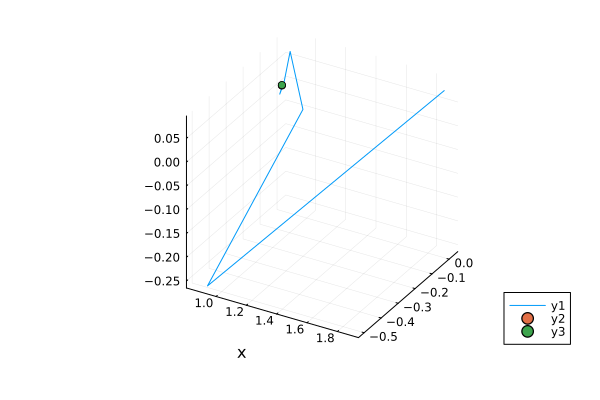

In [52]:
using Plots
plot(halo_linear[1,:], halo_linear[2,:], halo_linear[3,:], xlabel = "x")
scatter!([halo_linear[1,1]], [halo_linear[2,1]], [halo_linear[3,1]])
scatter!([L1[1]], [L1[2]], [L1[3]])

In [53]:
halo_linear[:,1]

6-element Vector{Float64}:
  0.8369180073169304
 -0.0003956249230764371
 -0.0008598143453306134
  0.0
  0.00013493122589173286
  0.00029324695409126806

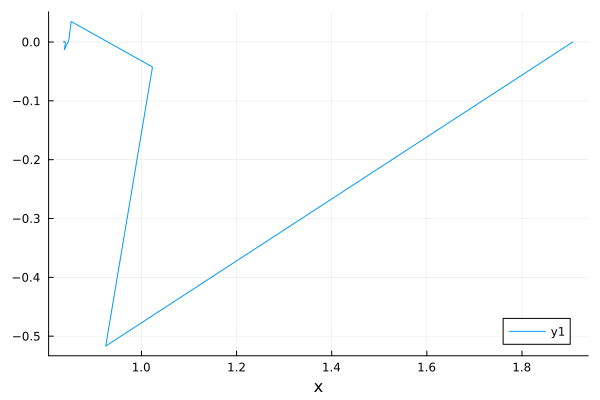

In [54]:
plot(halo_linear[1,:], halo_linear[2,:], xlabel = "x")

In [55]:
using DelimitedFiles
ztraj = (readdlm("halo.txt", '\t', Float64, '\n'))

7×50 Matrix{Float64}:
  0.838565      0.838052      0.837416     …   0.838903      0.838565
 -0.00484572   -0.00644152   -0.00731793      -0.00270695   -0.00484572
  2.12471e-21   2.29938e-21   2.22954e-21      1.72263e-21   2.12471e-21
 -0.00301604   -0.00407265   -0.00471268      -0.00166674   -0.00301604
 -0.0132601    -0.00877548   -0.0033289       -0.0162701    -0.0132601
  2.04515e-21   3.69612e-22  -1.33184e-21  …   3.51155e-21   2.04515e-21
  0.143492      0.143492      0.143492         0.143492      0.0625027

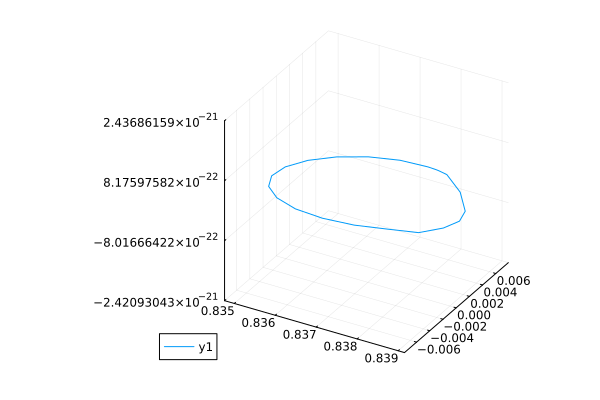

In [56]:
plot(ztraj[1,:], ztraj[2,:], ztraj[3,:])

In [74]:
#parameters for the Earth Moon system 

μ = 1.215e-2 #gravitational parameter
μ1 = 1-μ
μ2 = μ

pose_m1 = [-μ, 0, 0]
pose_m2 = [1-μ, 0, 0]

L = 3.850e5 #in km - distance between centers of m1 and m2
V = 1.025 #in km/s - orbital velocity of m1
T = 2.361e6 #in seconds - orbital period of m1 and m2

h_s = 100 #time step for RK4 in seconds # original 10 seconds
h_v = 100 #original 10 seconds

time_scale = T/(2*pi)

h_rk4 = h_s/time_scale #non dimensionalized time
print(h_rk4)

h_var = h_v/time_scale

one_min = 60/h_s #number of timesteps for 1 minute
min_day = 1440 #number of minutes this is a day
num_days = 3 # 6 days original
t_f=num_days*min_day 
N = Int(one_min*t_f) #time steps for duration

0.00026612390119354454

2592

In [69]:
function potential_energy(X)
    
     x = X[1]
     y = X[2]
     z = X[3]
    
    
     r1 = sqrt((x+μ2)^2 + y^2 + z^2) 
     r2 = sqrt((x-μ1)^2 + y^2 + z^2)
     #assuming m3 is unit mass
    
     U = (-μ1/r1)-(μ2/r2)-0.5*(μ1*μ2)
    
     return U
end

potential_energy (generic function with 1 method)

In [70]:
function effective_potential(X)
    
     x = X[1]
     y = X[2]
     z = X[3]
    
    
     #r1 = sqrt((x+μ2)^2 + y^2) 
     #r2 = sqrt((x-μ1)^2 + y^2)
    
    r1 = sqrt((x+μ2)^2 + y^2+z^2) 
    r2 = sqrt((x-μ1)^2 + y^2+z^2)
     #assuming m3 is unit mass
    
    #U = (-μ1/r1)-(μ2/r2)-0.5*(x^2+y^2)
    #U = (-μ1/r1)-(μ2/r2)-0.5*(μ1*x^2+μ2*y^2)
    
    U = (-μ1/r1)-(μ2/r2)-0.5*(μ1*r1^2+μ2*r2^2) # working
    
     return U
end

effective_potential (generic function with 1 method)

In [71]:
#derivation for rotating
function three_body_prob_dynamics(x)
        
    q = x[1:3]
    v = x[4:6]
    a = zeros(3)
    
    U_q = (ForwardDiff.gradient(_x -> effective_potential(_x), q))
        
    a[1] = 2*v[2] - U_q[1]
    a[2] = -2*v[1] - U_q[2]
    a[3] = -U_q[3]
    
    ẋ = [v; a] #x dot is velocity and acceleration
    
    return ẋ
end


three_body_prob_dynamics (generic function with 1 method)

In [72]:
function RK4_satellite_potential(x)

    f1 = three_body_prob_dynamics(x)
    f2 = three_body_prob_dynamics(x+0.5*h_rk4*f1)
    f3 = three_body_prob_dynamics(x+0.5*h_rk4*f2)
    f4 = three_body_prob_dynamics(x+h_rk4*f3)
    
    #forward in time
    xnext = x+(h_rk4/6.0)*(f1+2*f2+2*f3+f4)
    
    #backward in time
    #xnext = x-(h_rk4/6.0)*(f1+2*f2+2*f3+f4)
    
    return xnext
    
end

RK4_satellite_potential (generic function with 1 method)

In [ ]:
points_num = size(ztraj)[2]

In [ ]:
unstable_manifolds = [zeros(6,N) for i = 1:points_num]

In [67]:
for i=1:size(ztraj)[2]
#for i=1:10
    A = ForwardDiff.jacobian(_X -> non_linear_dynamics(_X), ztraj[1:6,i]) 
    stable = real(eigen(A).vectors)[:,1]
    unstable = real(eigen(A).vectors)[:,1]
    
    x_unstable = ztraj[1:6, i] + unstable
    
    unstable_manifolds[i] = x_unstable
    
    for k=2:N-1
        
    end
    #x_stable = ztraj[1:6, i] + stable
    
    
end

6-element Vector{Float64}:
 -2.9661934991311503
 -1.1102230246251565e-16
 -1.1102230246251565e-16
  0.0
  0.0
  2.96619349913115

6-element Vector{Float64}:
 -2.952368883309114
  4.336808689942018e-19
  4.336808689942018e-19
  1.6653345369377348e-16
  1.6653345369377348e-16
  2.9523688833091137

6-element Vector{Float64}:
 -2.9366937953613435
  0.0
  0.0
  1.8041124150158794e-16
  1.8041124150158794e-16
  2.936693795361344

6-element Vector{Float64}:
 -2.9213348721462413
 -3.3306690738754696e-16
 -3.3306690738754696e-16
  0.0
  0.0
  2.921334872146241

6-element Vector{Float64}:
 -2.90799050156825
  0.0
  0.0
  0.0
  0.0
  2.9079905015682503

6-element Vector{Float64}:
 -2.8977285205627745
 -3.885780586188048e-16
 -3.885780586188048e-16
 -2.6020852139652106e-18
 -2.6020852139652106e-18
  2.8977285205627745

6-element Vector{Float64}:
 -2.891057369720498
 -1.1102230246251565e-16
 -1.1102230246251565e-16
  0.0
  0.0
  2.891057369720498

6-element Vector{Float64}:
 -2.888132833117979
  6.776263578034403e-21
  6.776263578034403e-21
  1.6653345369377348e-16
  1.6653345369377348e-16
  2.888132833117979

6-element Vector{Float64}:
 -2.888973391095181
 -1.734723475976807e-18
 -1.734723475976807e-18
  3.3306690738754696e-16
  3.3306690738754696e-16
  2.8889733910951803

6-element Vector{Float64}:
 -2.8935770596542145
 -8.673617379884035e-19
 -8.673617379884035e-19
  1.6653345369377348e-16
  1.6653345369377348e-16
  2.893577059654215

6-element Vector{Float64}:
 -2.90188632733507
  2.7755575615628914e-17
  2.7755575615628914e-17
  5.551115123125783e-17
  5.551115123125783e-17
  2.9018863273350695

6-element Vector{Float64}:
 -2.9136169507115772
 -5.551115123125783e-17
 -5.551115123125783e-17
  6.938893903907228e-18
  6.938893903907228e-18
  2.9136169507115772

6-element Vector{Float64}:
 -2.928031048320513
 -1.734723475976807e-18
 -1.734723475976807e-18
  2.7755575615628914e-16
  2.7755575615628914e-16
  2.928031048320513

6-element Vector{Float64}:
 -2.943775680686415
 -2.7755575615628914e-17
 -2.7755575615628914e-17
 -2.7755575615628914e-17
 -2.7755575615628914e-17
  2.9437756806864144

6-element Vector{Float64}:
 -2.958907608937045
  0.0
  0.0
  0.0
  0.0
  2.958907608937045

6-element Vector{Float64}:
 -2.971171246671849
 -1.1102230246251565e-16
 -1.1102230246251565e-16
 -2.6020852139652106e-18
 -2.6020852139652106e-18
  2.97117124667185

6-element Vector{Float64}:
 -2.9784935416791973
 -1.6653345369377348e-16
 -1.6653345369377348e-16
  8.673617379884035e-19
  8.673617379884035e-19
  2.9784935416791978

6-element Vector{Float64}:
 -2.9797150490051845
 -4.336808689942018e-19
 -4.336808689942018e-19
  0.0
  0.0
  2.979715049005184

6-element Vector{Float64}:
 -2.978593904373195
 -1.0842021724855044e-19
 -1.0842021724855044e-19
  1.1102230246251565e-16
  1.1102230246251565e-16
  2.9785939043731955

6-element Vector{Float64}:
 -2.978575702762847
  0.0
  0.0
  3.469446951953614e-18
  3.469446951953614e-18
  2.9785757027628486

6-element Vector{Float64}:
 -2.978557387987143
  0.0
  0.0
  2.6020852139652106e-18
  2.6020852139652106e-18
  2.978557387987143

6-element Vector{Float64}:
 -2.978538953888093
 -8.673617379884035e-19
 -8.673617379884035e-19
  1.1102230246251565e-16
  1.1102230246251565e-16
  2.9785389538880933

6-element Vector{Float64}:
 -2.978520399716948
  0.0
  0.0
  1.6653345369377348e-16
  1.6653345369377348e-16
  2.978520399716949

6-element Vector{Float64}:
 -2.9785017252748878
 -5.551115123125783e-17
 -5.551115123125783e-17
  2.168404344971009e-19
  2.168404344971009e-19
  2.9785017252748887

6-element Vector{Float64}:
 -2.978482930509838
  0.0
  0.0
  2.168404344971009e-19
  2.168404344971009e-19
  2.9784829305098377

6-element Vector{Float64}:
 -2.978464015425653
 -6.505213034913027e-19
 -6.505213034913027e-19
  1.1102230246251565e-16
  1.1102230246251565e-16
  2.978464015425653

6-element Vector{Float64}:
 -2.978444980052223
 -1.1102230246251565e-16
 -1.1102230246251565e-16
  1.734723475976807e-18
  1.734723475976807e-18
  2.978444980052223

6-element Vector{Float64}:
 -2.978425824433272
 -1.6653345369377348e-16
 -1.6653345369377348e-16
  2.168404344971009e-19
  2.168404344971009e-19
  2.9784258244332715

6-element Vector{Float64}:
 -2.978406548620573
 -2.168404344971009e-19
 -2.168404344971009e-19
  5.551115123125783e-17
  5.551115123125783e-17
  2.9784065486205735

6-element Vector{Float64}:
 -2.9783871526709675
 -2.168404344971009e-19
 -2.168404344971009e-19
  1.6653345369377348e-16
  1.6653345369377348e-16
  2.9783871526709667

6-element Vector{Float64}:
 -2.978367636644581
 -1.1102230246251565e-16
 -1.1102230246251565e-16
  3.469446951953614e-18
  3.469446951953614e-18
  2.978367636644581

6-element Vector{Float64}:
 -2.9783480006038143
 -3.3306690738754696e-16
 -3.3306690738754696e-16
 -1.734723475976807e-18
 -1.734723475976807e-18
  2.9783480006038148

6-element Vector{Float64}:
 -2.9783282446126407
 -5.551115123125783e-17
 -5.551115123125783e-17
 -4.336808689942018e-19
 -4.336808689942018e-19
  2.9783282446126402

6-element Vector{Float64}:
 -2.978308368736047
  0.0
  0.0
  1.6653345369377348e-16
  1.6653345369377348e-16
  2.9783083687360477

6-element Vector{Float64}:
 -2.978288373039687
 -5.551115123125783e-17
 -5.551115123125783e-17
 -1.0842021724855044e-19
 -1.0842021724855044e-19
  2.978288373039687

6-element Vector{Float64}:
 -2.978268257589476
  2.168404344971009e-19
  2.168404344971009e-19
  1.1102230246251565e-16
  1.1102230246251565e-16
  2.9782682575894768

6-element Vector{Float64}:
 -2.9782480224511754
  0.0
  0.0
  2.220446049250313e-16
  2.220446049250313e-16
  2.9782480224511754

6-element Vector{Float64}:
 -2.978227667689949
  0.0
  0.0
  1.0408340855860843e-17
  1.0408340855860843e-17
  2.97822766768995

6-element Vector{Float64}:
 -2.9782071933696486
 -2.7755575615628914e-16
 -2.7755575615628914e-16
 -8.673617379884035e-19
 -8.673617379884035e-19
  2.978207193369648

6-element Vector{Float64}:
 -2.9781865995518437
 -2.168404344971009e-18
 -2.168404344971009e-18
  2.220446049250313e-16
  2.220446049250313e-16
  2.9781865995518455

6-element Vector{Float64}:
 -2.9781658862942066
  0.0
  0.0
  0.0
  0.0
  2.978165886294207

6-element Vector{Float64}:
 -2.9781450536476757
 -1.6653345369377348e-16
 -1.6653345369377348e-16
 -2.168404344971009e-19
 -2.168404344971009e-19
  2.9781450536476757

6-element Vector{Float64}:
 -2.9781241016511166
 -1.1102230246251565e-16
 -1.1102230246251565e-16
 -3.2526065174565133e-19
 -3.2526065174565133e-19
  2.9781241016511166

6-element Vector{Float64}:
 -2.978103030319926
  5.421010862427522e-20
  5.421010862427522e-20
  1.1102230246251565e-16
  1.1102230246251565e-16
  2.978103030319927

6-element Vector{Float64}:
 -2.978081839618281
 -1.1102230246251565e-16
 -1.1102230246251565e-16
  0.0
  0.0
  2.978081839618282

6-element Vector{Float64}:
 -2.9780605293744644
  0.0
  0.0
  0.0
  0.0
  2.978060529374463

6-element Vector{Float64}:
 -2.9780390989023395
 -2.220446049250313e-16
 -2.220446049250313e-16
  3.469446951953614e-18
  3.469446951953614e-18
  2.9780390989023395

6-element Vector{Float64}:
 -2.9780175423000412
 -3.469446951953614e-18
 -3.469446951953614e-18
  1.6653345369377348e-16
  1.6653345369377348e-16
  2.978017542300042

6-element Vector{Float64}:
 -2.975943132476128
 -6.505213034913027e-19
 -6.505213034913027e-19
  0.0
  0.0
  2.9759431324761283

6-element Vector{Float64}:
 -2.9661934991311494
 -2.220446049250313e-16
 -2.220446049250313e-16
 -1.734723475976807e-18
 -1.734723475976807e-18
  2.9661934991311494